# Edited by Ashen; 微信公众号:爱研思谈; Github:AshenOneme

### OpenSeespy中的常用材料
### 例举了常用的钢材以及混凝土材料，可以满足基本的构件/框架分析需求

In [1]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
from pylab import *
import os

## Steel01

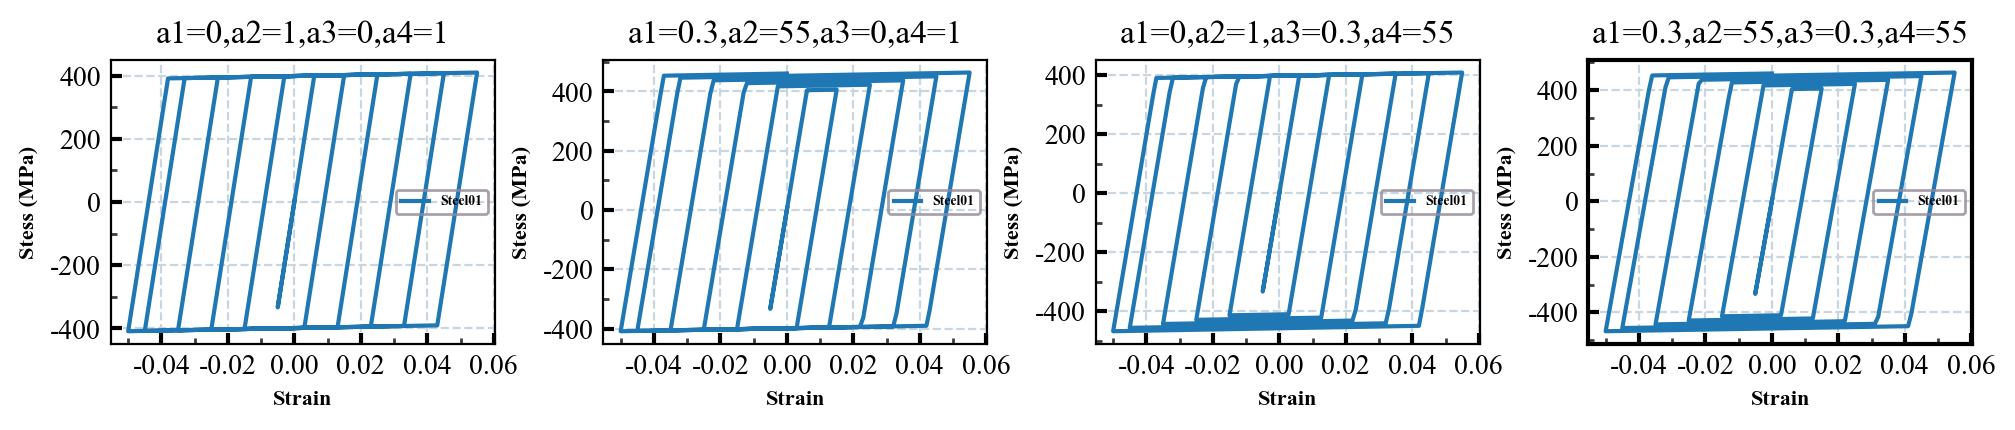

In [2]:
if not os.path.exists('Steel01'):
    os.makedirs('Steel01')
IDSteel = 1
Fy_Steel = 400
E0_Steel = 200000
bs_Steel_ = [0.001,0.001,0.001,0.001]
a1_=[0,0.3,0,0.3]
a2_=[1,55,1,55]
a3_=[0,0,0.3,0.3]
a4_=[1,1,55,55]
font_Times_New_Roman={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":8}
font_Times_New_Roman_legend={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}

font_Song={"family":"SimSun",
        "style":"italic",
        "weight":"heavy",
        "size":15}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,2),dpi=200)
# fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
fig.tight_layout()
bwith = 1.5 


for i,ax in zip(range(4),axes.flatten()):
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 3)
    bs_Steel=bs_Steel_[i]
    a1=a1_[i]
    a2=a2_[i]
    a3=a3_[i]
    a4=a4_[i]
    ops.uniaxialMaterial('Steel01', IDSteel, Fy_Steel, E0_Steel, bs_Steel,a1,a2,a3,a4)
    ops.node(1,0,0)
    ops.node(2,100,0)
    ops.equalDOF(1,2,2,3)
    ops.fix(1,1,1,1)
    ops.fix(2,0,1,1)
    ops.element('twoNodeLink',1,1,2,'-mat',IDSteel,'-dir',1)
    ops.recorder('Node', '-file', f"./Steel01/IDSteel_Disp{i}.txt","-time",'-node', 2, '-dof',1, 'disp')
    ops.recorder('Node', '-file', f"./Steel01/IDSteel_Reaction{i}.txt","-time",'-node', 1, '-dof',1, 'reaction')
    ops.timeSeries('Linear', 11)
    ops.pattern('Plain', 100,11)
    ops.sp(2,1,1)
    ops.system("BandGeneral")
    ops.numberer("RCM")
    ops.constraints("Penalty",1e5,1e5)
    ops.test('NormDispIncr', 1e-5, 2000)
    ops.algorithm("KrylovNewton")

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(50)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(100)

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(200)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(300)

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(400)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(500)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(60)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(70)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(80)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(90)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(100)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(105)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(50)

    ops.wipe()

    Disp=np.loadtxt(f'./Steel01/IDSteel_Disp{i}.txt',usecols=1)
    Force=np.loadtxt(f'./Steel01/IDSteel_Reaction{i}.txt',usecols=1)
    TK = plt.gca()
    TK.spines['bottom'].set_linewidth(bwith)
    TK.spines['left'].set_linewidth(bwith)
    TK.spines['top'].set_linewidth(bwith)
    TK.spines['right'].set_linewidth(bwith)
    ax.plot(-Disp,Force,label='Steel01')
    x_major_locator=MultipleLocator(0.02)
    ax.xaxis.set_major_locator(x_major_locator)
    y_major_locator=MultipleLocator(200)
    ax.yaxis.set_major_locator(y_major_locator)
    x_minor_locator=MultipleLocator(0.01)
    ax.xaxis.set_minor_locator(x_minor_locator)
    y_minor_locator=MultipleLocator(100)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.tick_params(axis='x',which='major',direction='in',labelsize=10,length=4,width=1.5) 
    ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=20,length=2,width=1)
    ax.tick_params(axis='y',which='major',direction='in',labelsize=10,length=4,width=1.5)
    ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=20,length=2,width=1) 
    ax.grid(linestyle='--',color='#c9d6df')                      
    ax.set_xlabel('Strain',fontproperties=font_Times_New_Roman)
    ax.set_ylabel('Stess (MPa)',fontproperties=font_Times_New_Roman)
    ax.set_title(f'a1={a1},a2={a2},a3={a3},a4={a4}')
    ax.legend(prop=font_Times_New_Roman_legend,edgecolor='#928a97',facecolor='none')
plt.show()

## Steel02

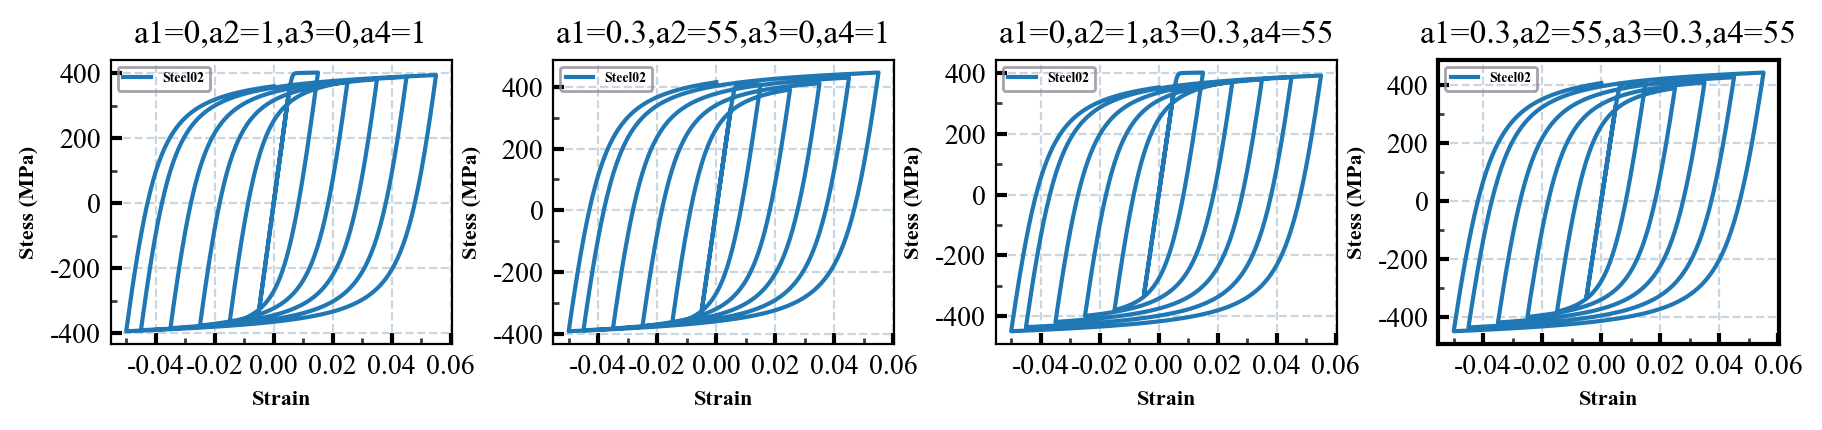

In [3]:
if not os.path.exists('Steel02'):
    os.makedirs('Steel02')
IDSteel = 1
Fy_Steel = 400
E0_Steel = 200000
bs_Steel_ = [0.001,0.001,0.001,0.001]
R0_ = [15.0,15.0,15.0,15.0]
cR1_ = [0.925,0.925,0.925,0.925]
cR2_ = [0.15,0.15,0.15,0.15]
a1_=[0,0.3,0,0.3]
a2_=[1,55,1,55]
a3_=[0,0,0.3,0.3]
a4_=[1,1,55,55]
font_Times_New_Roman={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":8}
font_Times_New_Roman_legend={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}

font_Song={"family":"SimSun",
        "style":"italic",
        "weight":"heavy",
        "size":15}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(9,2),dpi=200)
# fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
fig.tight_layout()
bwith = 1.5 


for i,ax in zip(range(4),axes.flatten()):
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 3)
    bs_Steel=bs_Steel_[i]
    R0=R0_[i]
    cR1=cR1_[i]
    cR2=cR2_[i]
    a1=a1_[i]
    a2=a2_[i]
    a3=a3_[i]
    a4=a4_[i]
    ops.uniaxialMaterial('Steel02', IDSteel, Fy_Steel, E0_Steel, bs_Steel,R0,cR1,cR2,a1,a2,a3,a4)
    ops.node(1,0,0)
    ops.node(2,100,0)
    ops.equalDOF(1,2,2,3)
    ops.fix(1,1,1,1)
    ops.fix(2,0,1,1)
    ops.element('twoNodeLink',1,1,2,'-mat',IDSteel,'-dir',1)
    ops.recorder('Node', '-file', f"./Steel02/IDSteel_Disp{i}.txt","-time",'-node', 2, '-dof',1, 'disp')
    ops.recorder('Node', '-file', f"./Steel02/IDSteel_Reaction{i}.txt","-time",'-node', 1, '-dof',1, 'reaction')
    ops.timeSeries('Linear', 11)
    ops.pattern('Plain', 100,11)
    ops.sp(2,1,1)
    ops.system("BandGeneral")
    ops.numberer("RCM")
    ops.constraints("Penalty",1e5,1e5)
    ops.test('NormDispIncr', 1e-5, 2000)
    ops.algorithm("KrylovNewton")

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(50)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(100)

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(200)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(300)

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(400)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(500)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(60)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(70)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(80)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(90)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(100)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(105)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(50)

    ops.wipe()

    Disp=np.loadtxt(f'./Steel02/IDSteel_Disp{i}.txt',usecols=1)
    Force=np.loadtxt(f'./Steel02/IDSteel_Reaction{i}.txt',usecols=1)
    TK = plt.gca()
    TK.spines['bottom'].set_linewidth(bwith)
    TK.spines['left'].set_linewidth(bwith)
    TK.spines['top'].set_linewidth(bwith)
    TK.spines['right'].set_linewidth(bwith)
    ax.plot(-Disp,Force,label='Steel02')
    x_major_locator=MultipleLocator(0.02)
    ax.xaxis.set_major_locator(x_major_locator)
    y_major_locator=MultipleLocator(200)
    ax.yaxis.set_major_locator(y_major_locator)
    x_minor_locator=MultipleLocator(0.01)
    ax.xaxis.set_minor_locator(x_minor_locator)
    y_minor_locator=MultipleLocator(100)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.tick_params(axis='x',which='major',direction='in',labelsize=10,length=4,width=1.5) 
    ax.tick_params(axis='x',which='minor',direction='in',color='#393e46',labelsize=20,length=2,width=1)
    ax.tick_params(axis='y',which='major',direction='in',labelsize=10,length=4,width=1.5)
    ax.tick_params(axis='y',which='minor',direction='in',color='#393e46',labelsize=20,length=2,width=1) 
    ax.grid(linestyle='--',color='#c9d6df')                      
    ax.set_xlabel('Strain',fontproperties=font_Times_New_Roman)
    ax.set_ylabel('Stess (MPa)',fontproperties=font_Times_New_Roman)
    ax.set_title(f'a1={a1},a2={a2},a3={a3},a4={a4}')
    ax.legend(prop=font_Times_New_Roman_legend,edgecolor='#928a97',facecolor='none')
plt.show()

## RambergOsgoodSteel

RambergOsgoodSteel unaxial material - Written by R.Rahimi & R.Sepasdar & Dr. Mo. R. Banan Shiraz University Copyright 2012; 


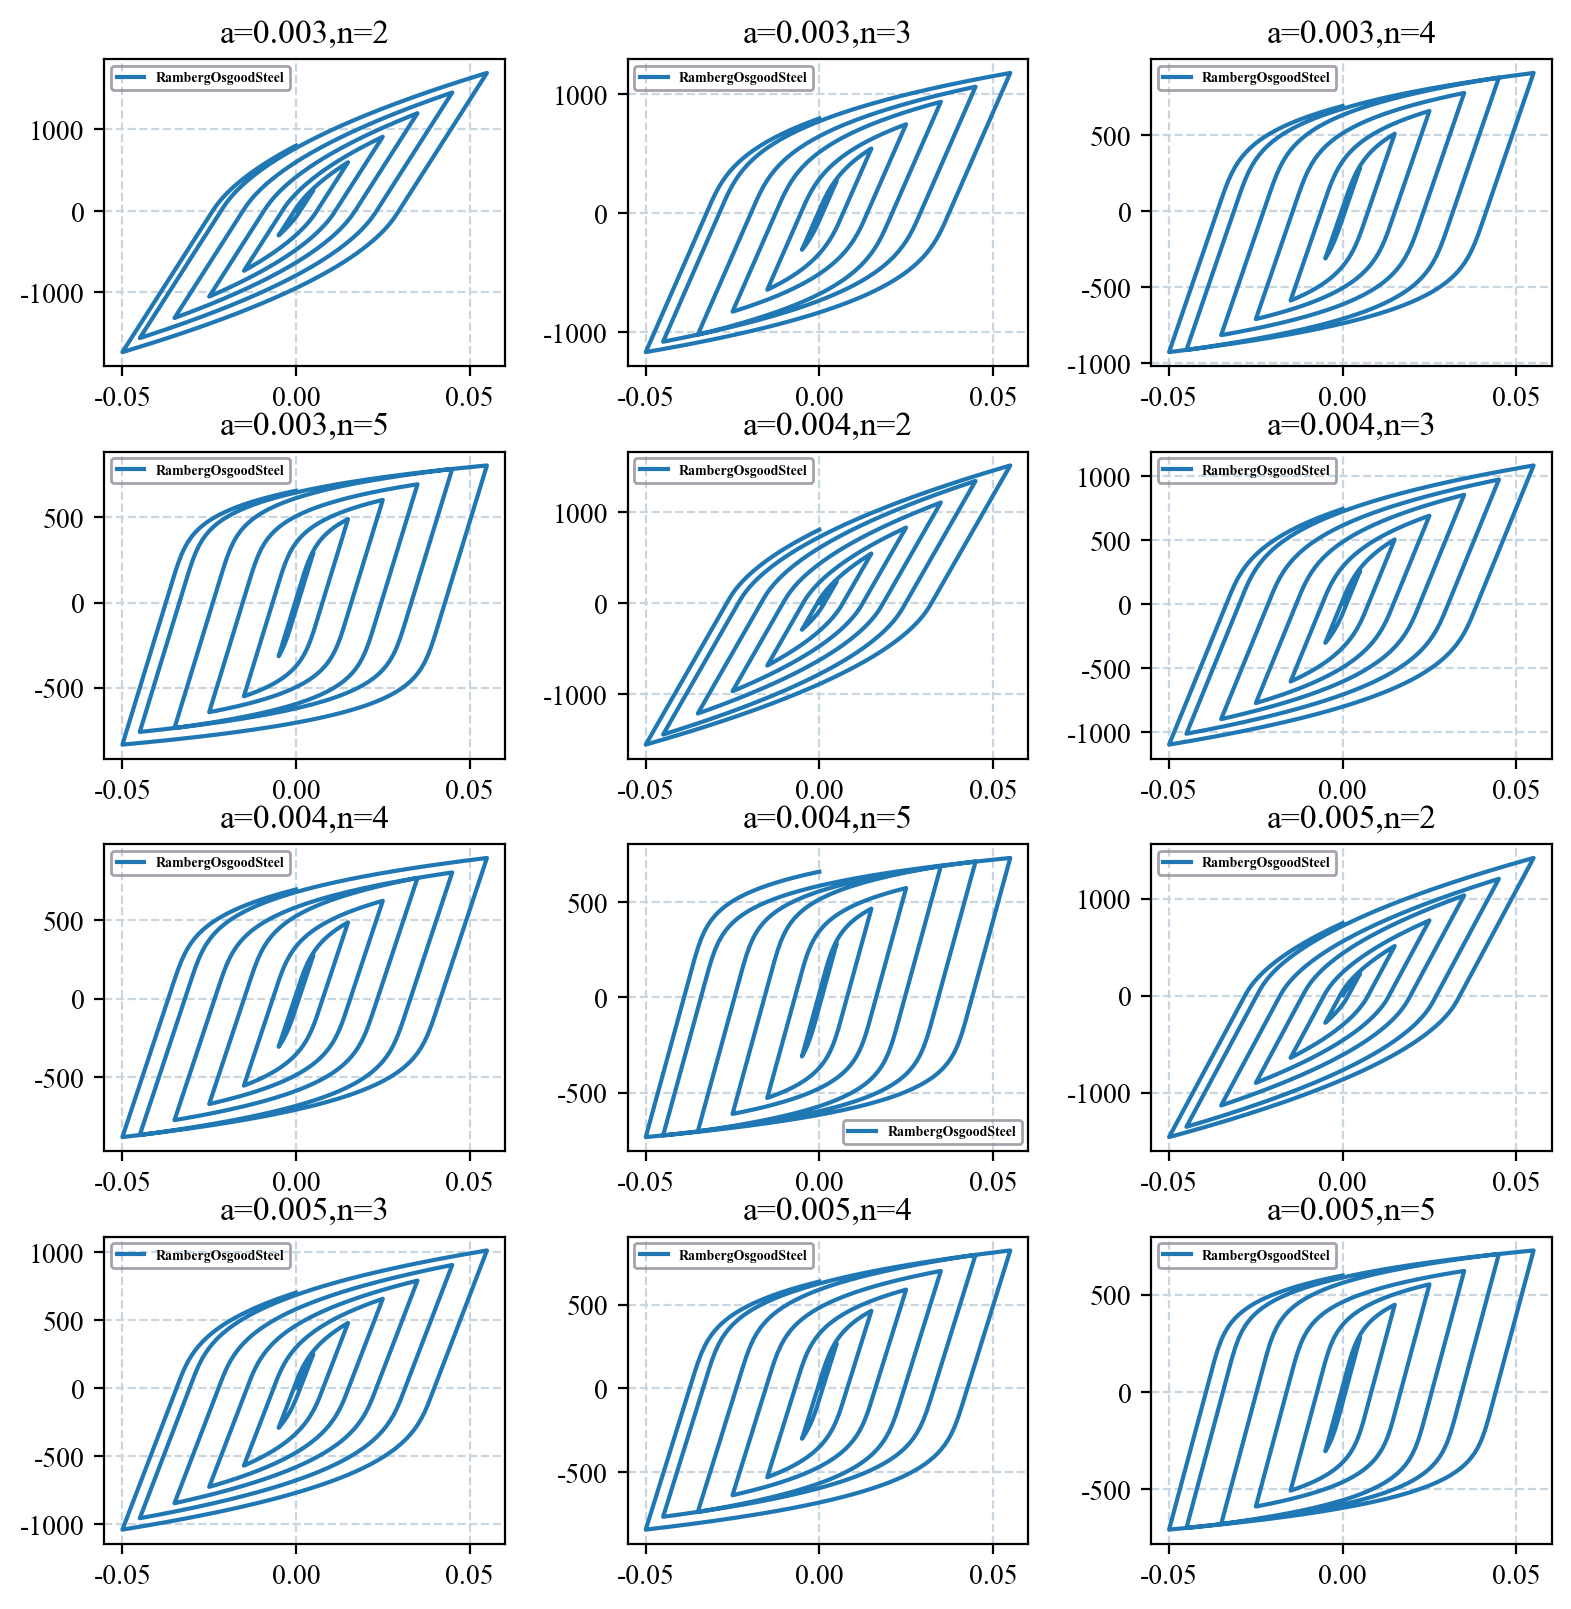

In [4]:
if not os.path.exists('RambergOsgoodSteel'):
    os.makedirs('RambergOsgoodSteel')
IDSteel = 1
Fy_Steel = 400
E0_Steel = 200000
a_ = [0.003,0.003,0.003,0.003,0.004,0.004,0.004,0.004,0.005,0.005,0.005,0.005,0.006,0.006,0.006,0.006]
n_=[2,3,4,5,2,3,4,5,2,3,4,5,2,3,4,5]
font_Times_New_Roman={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}
font_Times_New_Roman_legend={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}

font_Song={"family":"SimSun",
        "style":"italic",
        "weight":"heavy",
        "size":15}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(8,8),dpi=200)
# fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
fig.tight_layout()
bwith = 1.5 


for i,ax in zip(range(12),axes.flatten()):
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 3)

    a=a_[i]
    n=n_[i]
    ops.uniaxialMaterial('RambergOsgoodSteel', IDSteel, Fy_Steel, E0_Steel, a,n)
    ops.node(1,0,0)
    ops.node(2,100,0)
    ops.equalDOF(1,2,2,3)
    ops.fix(1,1,1,1)
    ops.fix(2,0,1,1)
    ops.element('twoNodeLink',1,1,2,'-mat',IDSteel,'-dir',1)
    ops.recorder('Node', '-file', f"./RambergOsgoodSteel/IDSteel_Disp{i}.txt","-time",'-node', 2, '-dof',1, 'disp')
    ops.recorder('Node', '-file', f"./RambergOsgoodSteel/IDSteel_Reaction{i}.txt","-time",'-node', 1, '-dof',1, 'reaction')
    ops.timeSeries('Linear', 11)
    ops.pattern('Plain', 100,11)
    ops.sp(2,1,1)
    ops.system("BandGeneral")
    ops.numberer("RCM")
    ops.constraints("Penalty",1e5,1e5)
    ops.test('NormDispIncr', 1e-5, 2000)
    ops.algorithm("KrylovNewton")

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(50)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(100)

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(200)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(300)

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(400)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(500)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(60)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(70)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(80)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(90)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(100)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(105)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(50)

    ops.wipe()

    Disp=np.loadtxt(f'./RambergOsgoodSteel/IDSteel_Disp{i}.txt',usecols=1)
    Force=np.loadtxt(f'./RambergOsgoodSteel/IDSteel_Reaction{i}.txt',usecols=1)

    ax.plot(-Disp,Force,label='RambergOsgoodSteel')
    
    ax.grid(linestyle='--',color='#c9d6df')                      
    
    ax.set_title(f'a={a},n={n}')
    ax.legend(prop=font_Times_New_Roman_legend,edgecolor='#928a97',facecolor='none')
plt.show()

## Reinforcing Steel

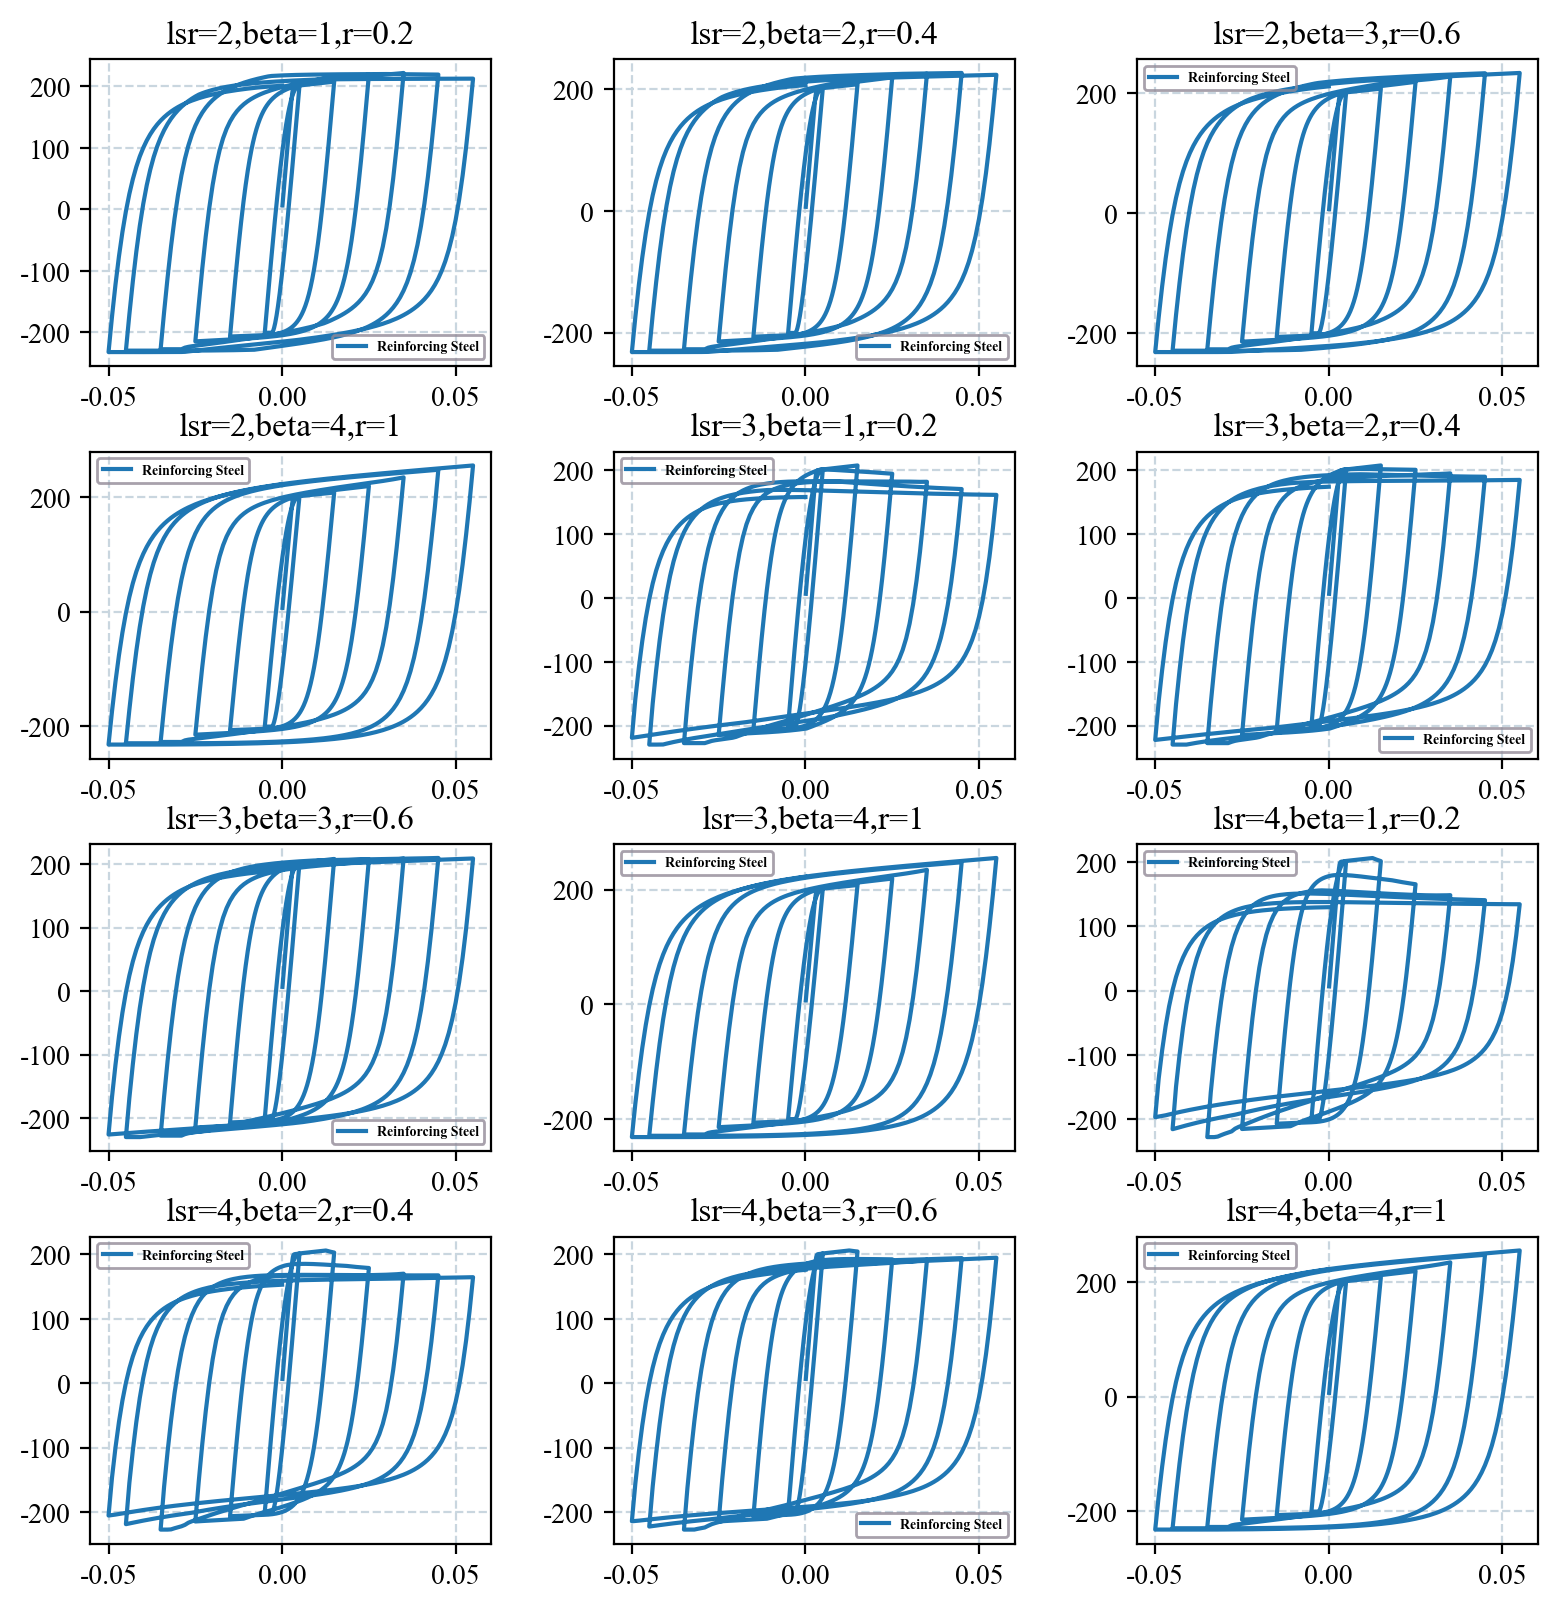

In [5]:
if not os.path.exists('Reinforcing Steel'):
    os.makedirs('Reinforcing Steel')
IDSteel = 1
Fy_Steel = 200
fu_Steel = 220
Es=200000
Esh=200
esh=0.005
eult=0.06
lsr_=[2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5]
beta_=[1,2,3,4,1,2,3,4,1,2,3,4]
r_=[0.2,0.4,0.6,1,0.2,0.4,0.6,1,0.2,0.4,0.6,1]
font_Times_New_Roman={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}
font_Times_New_Roman_legend={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}

font_Song={"family":"SimSun",
        "style":"italic",
        "weight":"heavy",
        "size":15}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(8,8),dpi=200)
# fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
fig.tight_layout()
bwith = 1.5 


for i,ax in zip(range(12),axes.flatten()):
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 3)

    lsr=lsr_[i]
    beta=beta_[i]
    r=r_[i]
    ops.uniaxialMaterial('ReinforcingSteel', IDSteel, Fy_Steel, fu_Steel,Es,Esh,esh,eult,'-GABuck',lsr,beta,r,0.1)
    ops.node(1,0,0)
    ops.node(2,100,0)
    ops.equalDOF(1,2,2,3)
    ops.fix(1,1,1,1)
    ops.fix(2,0,1,1)
    ops.element('twoNodeLink',1,1,2,'-mat',IDSteel,'-dir',1)
    ops.recorder('Node', '-file', f"./Reinforcing Steel/IDSteel_Disp{i}.txt","-time",'-node', 2, '-dof',1, 'disp')
    ops.recorder('Node', '-file', f"./Reinforcing Steel/IDSteel_Reaction{i}.txt","-time",'-node', 1, '-dof',1, 'reaction')
    ops.timeSeries('Linear', 11)
    ops.pattern('Plain', 100,11)
    ops.sp(2,1,1)
    ops.system("BandGeneral")
    ops.numberer("RCM")
    ops.constraints("Penalty",1e5,1e5)
    ops.test('NormDispIncr', 1e-5, 2000)
    ops.algorithm("KrylovNewton")

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(50)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(100)

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(200)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(300)

    ops.integrator("DisplacementControl",2,1,-0.0001)
    ops.analysis("Static")
    ops.analyze(400)

    ops.integrator("DisplacementControl",2,1,0.0001)
    ops.analysis("Static")
    ops.analyze(500)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(60)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(70)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(80)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(90)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(100)

    ops.integrator("DisplacementControl",2,1,0.001)
    ops.analysis("Static")
    ops.analyze(105)

    ops.integrator("DisplacementControl",2,1,-0.001)
    ops.analysis("Static")
    ops.analyze(50)

    ops.wipe()

    Disp=np.loadtxt(f'./Reinforcing Steel/IDSteel_Disp{i}.txt',usecols=1)
    Force=np.loadtxt(f'./Reinforcing Steel/IDSteel_Reaction{i}.txt',usecols=1)

    ax.plot(-Disp,Force,label='Reinforcing Steel')
    
    ax.grid(linestyle='--',color='#c9d6df')                      
    
    ax.set_title(f'lsr={lsr},beta={beta},r={r}')
    ax.legend(prop=font_Times_New_Roman_legend,edgecolor='#928a97',facecolor='none')
plt.show()

## Concrete01

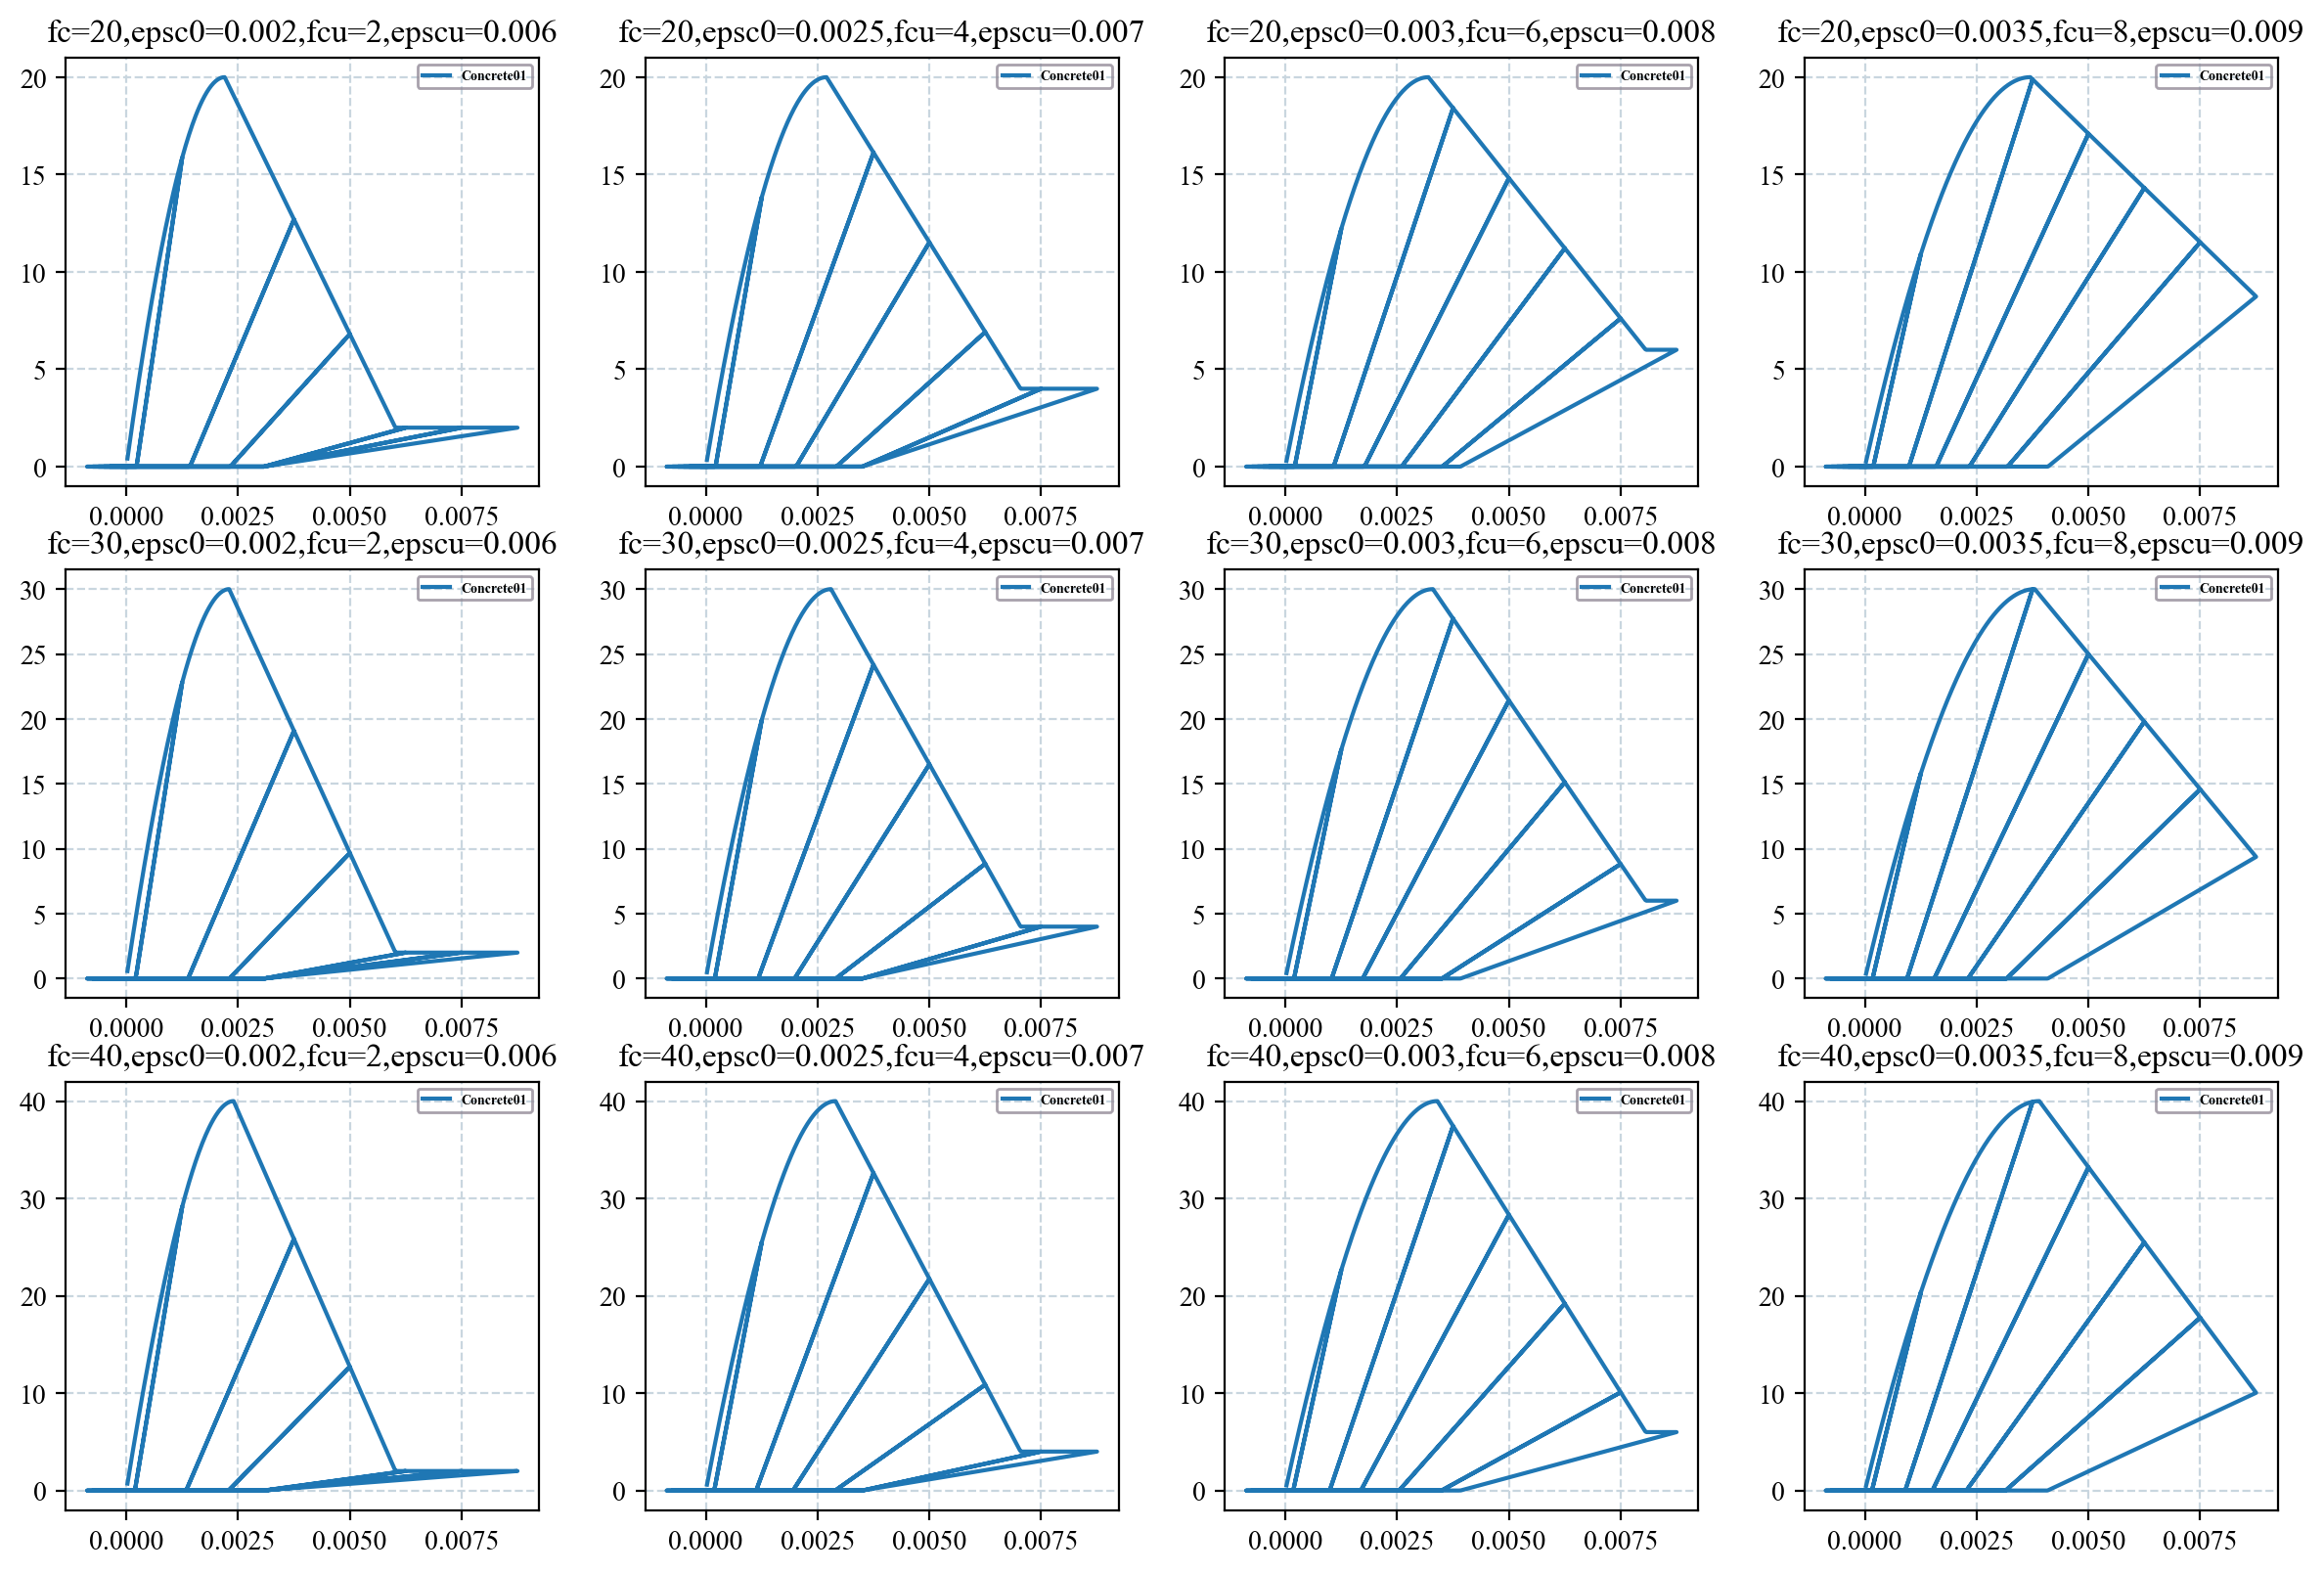

In [6]:
if not os.path.exists('Concrete01'):
    os.makedirs('Concrete01')
IDConcrete = 1
fc_=[20,20,20,20,30,30,30,30,40,40,40,40,50,50,50,50]
epsco_=[0.002,0.0025,0.003,0.0035,0.002,0.0025,0.003,0.0035,0.002,0.0025,0.003,0.0035]
fcu_=[2,4,6,8,2,4,6,8,2,4,6,8]
epscu_=[0.006,0.007,0.008,0.009,0.006,0.007,0.008,0.009,0.006,0.007,0.008,0.009]
font_Times_New_Roman={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}
font_Times_New_Roman_legend={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}

font_Song={"family":"SimSun",
        "style":"italic",
        "weight":"heavy",
        "size":15}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(12,8),dpi=200)
# fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
fig.tight_layout()
bwith = 1.5 


for i,ax in zip(range(12),axes.flatten()):
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 3)

    fc=fc_[i]
    epsco=epsco_[i]
    fcu=fcu_[i]
    epscu=epscu_[i]

    ops.uniaxialMaterial('Concrete01', IDConcrete,fc,epsco,fcu,epscu)
    ops.node(1,0,0)
    ops.node(2,100,0)
    ops.equalDOF(1,2,2,3)
    ops.fix(1,1,1,1)
    ops.fix(2,0,1,1)
    ops.element('twoNodeLink',1,1,2,'-mat',IDSteel,'-dir',1)
    ops.recorder('Node', '-file', f"./Concrete01/IDConcrete_Disp{i}.txt","-time",'-node', 2, '-dof',1, 'disp')
    ops.recorder('Node', '-file', f"./Concrete01/IDConcrete_Reaction{i}.txt","-time",'-node', 1, '-dof',1, 'reaction')
    ops.timeSeries('Linear', 11)
    ops.pattern('Plain', 100,11)
    ops.sp(2,1,1)
    ops.system("BandGeneral")
    ops.numberer("RCM")
    ops.constraints("Penalty",1e5,1e5)
    ops.test('NormDispIncr', 1e-5, 2000)
    ops.algorithm("KrylovNewton")

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(50)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(55)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(155)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(165)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(215)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(220)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(270)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(275)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(325)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(330)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(380)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(385)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(35)

    ops.wipe()

    Disp=np.loadtxt(f'./Concrete01/IDConcrete_Disp{i}.txt',usecols=1)
    Force=np.loadtxt(f'./Concrete01/IDConcrete_Reaction{i}.txt',usecols=1)

    ax.plot(-Disp,Force,label='Concrete01')
    
    ax.grid(linestyle='--',color='#c9d6df')                      
    
    ax.set_title(f'fc={fc},epsc0={epsco},fcu={fcu},epscu={epscu}')
    ax.legend(prop=font_Times_New_Roman_legend,edgecolor='#928a97',facecolor='none')
plt.show()

## Concrete02

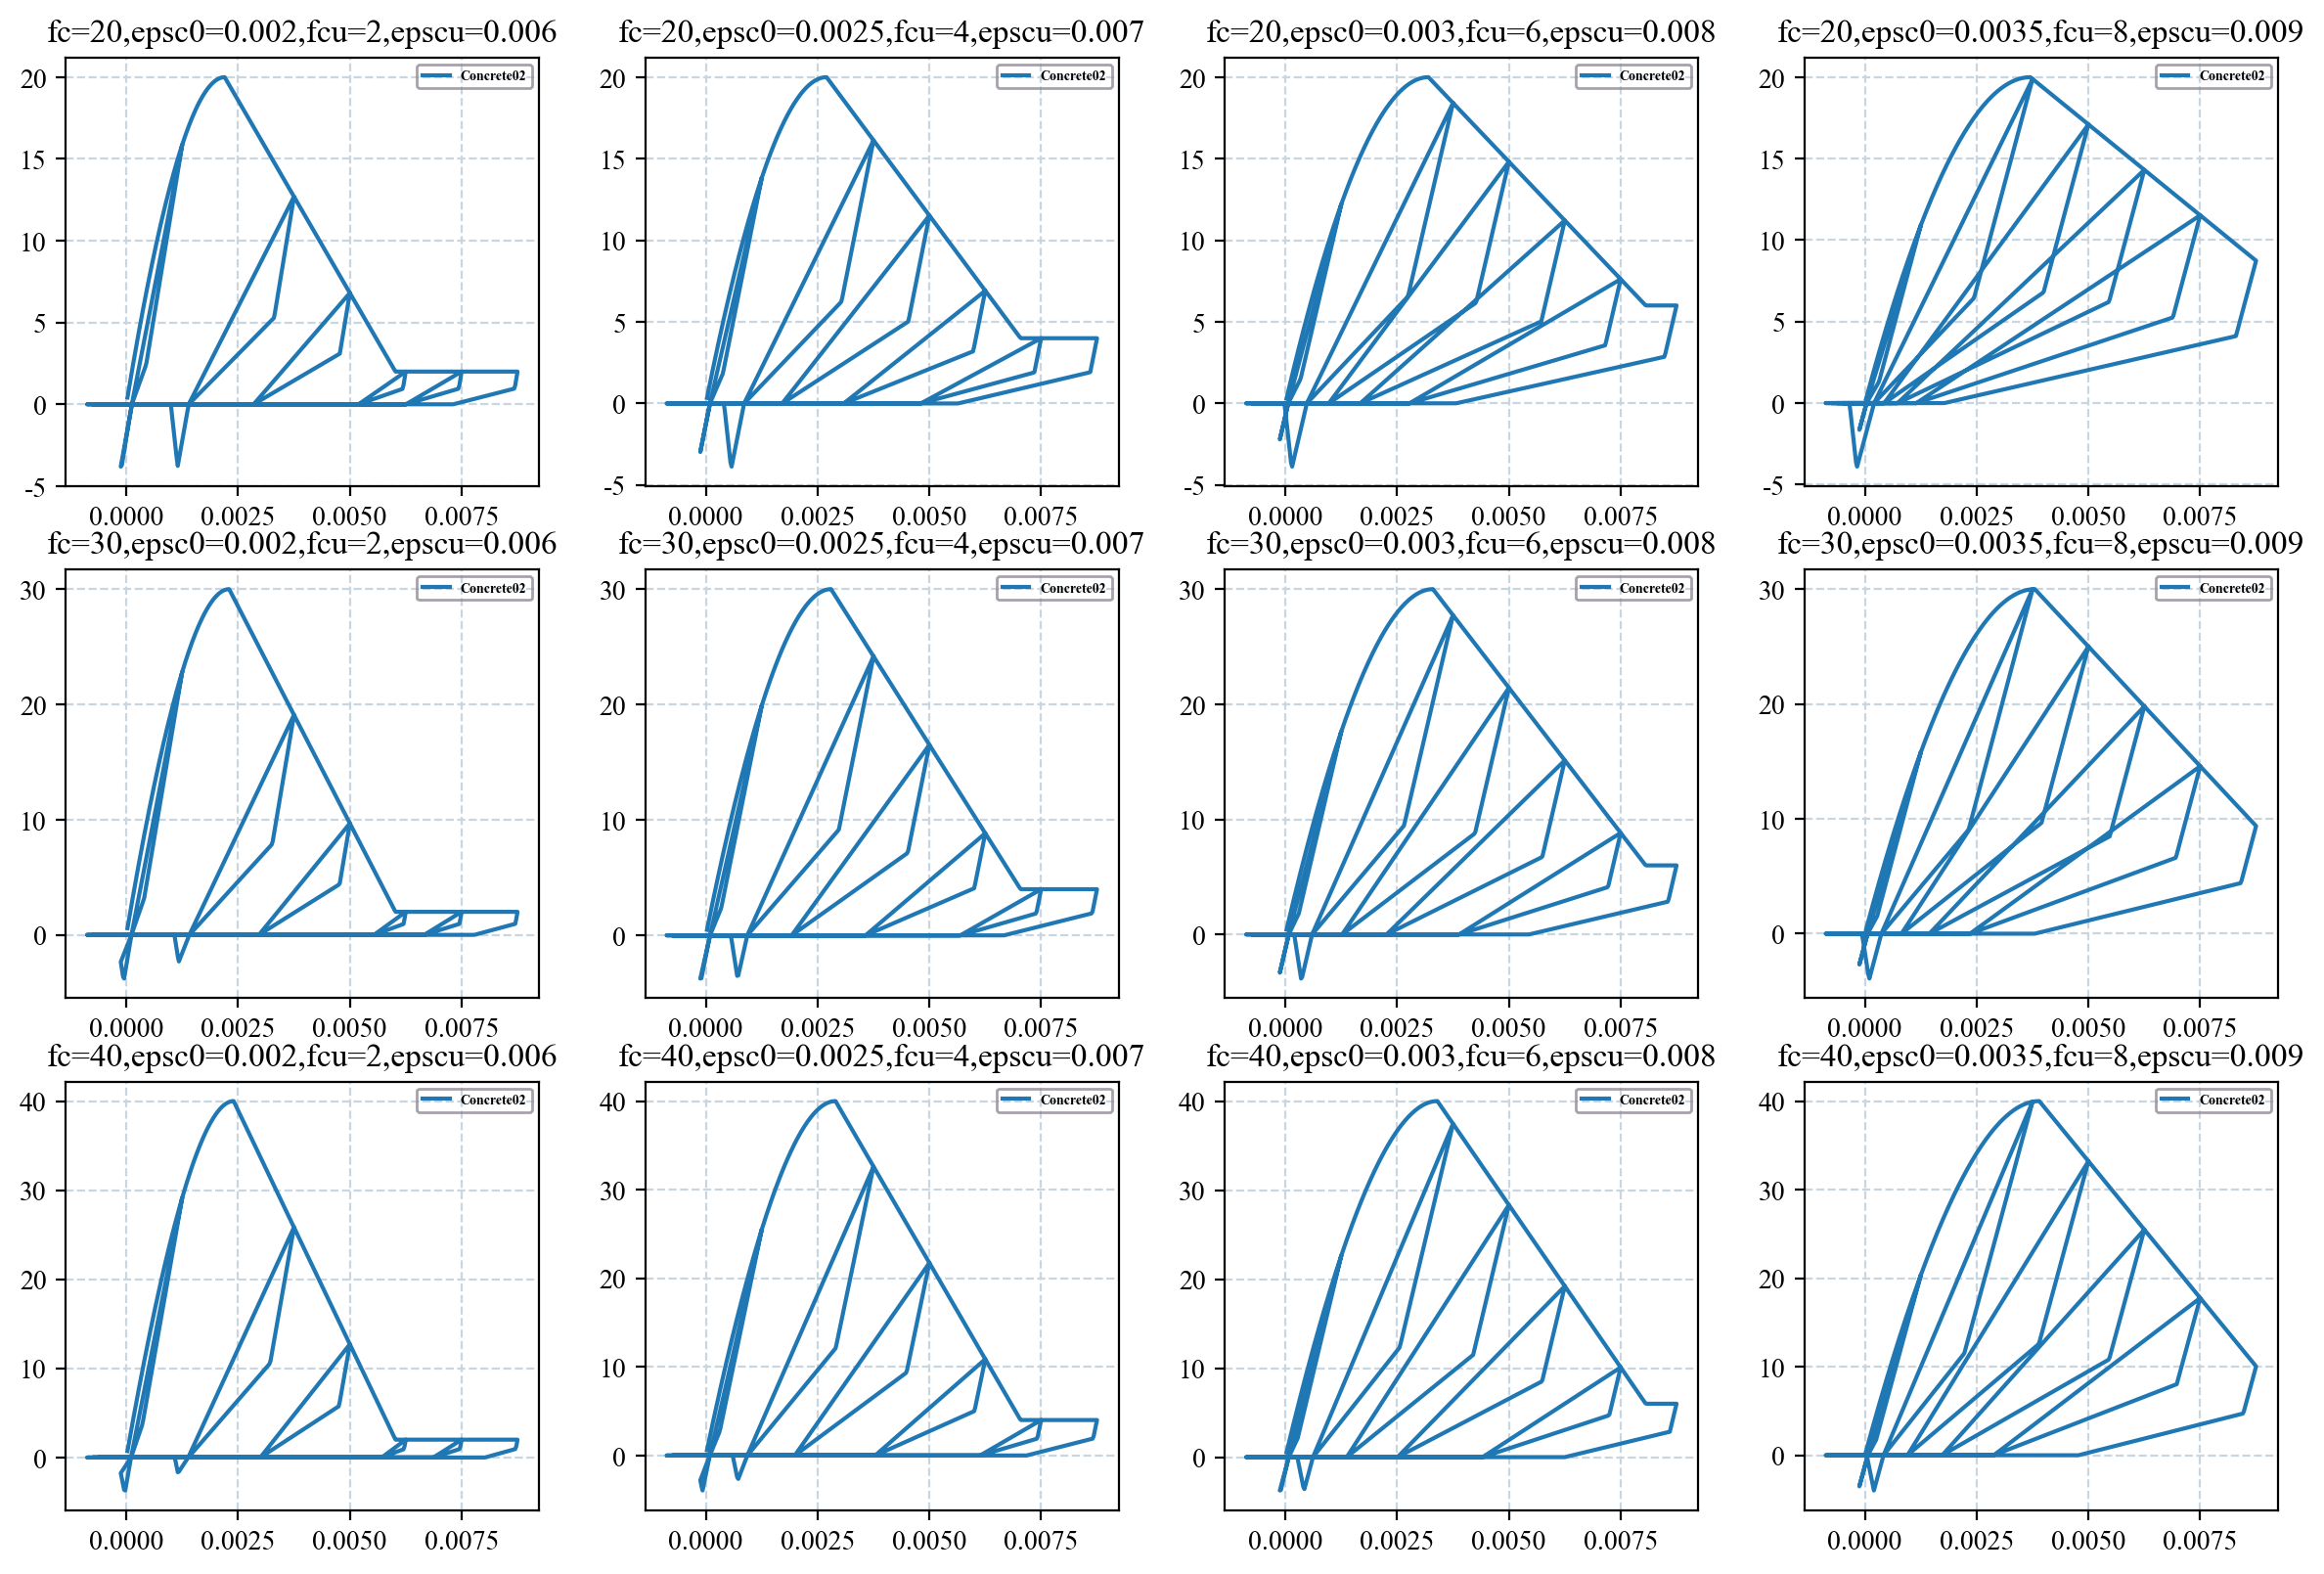

In [7]:
if not os.path.exists('Concrete02'):
    os.makedirs('Concrete02')
IDConcrete = 1
fc_=[20,20,20,20,30,30,30,30,40,40,40,40,50,50,50,50]
epsc0_=[0.002,0.0025,0.003,0.0035,0.002,0.0025,0.003,0.0035,0.002,0.0025,0.003,0.0035]
fcu_=[2,4,6,8,2,4,6,8,2,4,6,8]
epscu_=[0.006,0.007,0.008,0.009,0.006,0.007,0.008,0.009,0.006,0.007,0.008,0.009]
Lambda_=[0.1 for i in range(12)]
ft_=[4 for i in range(12)]
Ets_=[20000 for i in range(12)]
font_Times_New_Roman={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}
font_Times_New_Roman_legend={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}

font_Song={"family":"SimSun",
        "style":"italic",
        "weight":"heavy",
        "size":15}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(12,8),dpi=200)
# fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
fig.tight_layout()
bwith = 1.5 


for i,ax in zip(range(12),axes.flatten()):
    ops.wipe()
    ops.model('basic', '-ndm', 2, '-ndf', 3)

    fc=fc_[i]
    epsc0=epsc0_[i]
    fcu=fcu_[i]
    epscu=epscu_[i]
    Lambda=Lambda_[i]
    ft=ft_[i]
    Ets=Ets_[i]


    ops.uniaxialMaterial('Concrete02', IDConcrete,-fc,-epsc0,-fcu,-epscu,Lambda,ft,Ets)
    ops.node(1,0,0)
    ops.node(2,100,0)
    ops.equalDOF(1,2,2,3)
    ops.fix(1,1,1,1)
    ops.fix(2,0,1,1)
    ops.element('twoNodeLink',1,1,2,'-mat',IDSteel,'-dir',1)
    ops.recorder('Node', '-file', f"./Concrete02/IDConcrete_Disp{i}.txt","-time",'-node', 2, '-dof',1, 'disp')
    ops.recorder('Node', '-file', f"./Concrete02/IDConcrete_Reaction{i}.txt","-time",'-node', 1, '-dof',1, 'reaction')
    ops.timeSeries('Linear', 11)
    ops.pattern('Plain', 100,11)
    ops.sp(2,1,1)
    ops.system("BandGeneral")
    ops.numberer("RCM")
    ops.constraints("Penalty",1e5,1e5)
    ops.test('NormDispIncr', 1e-5, 2000)
    ops.algorithm("KrylovNewton")

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(50)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(55)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(155)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(165)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(215)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(220)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(270)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(275)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(325)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(330)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(380)

    ops.integrator("DisplacementControl",2,1,0.000025)
    ops.analysis("Static")
    ops.analyze(385)

    ops.integrator("DisplacementControl",2,1,-0.000025)
    ops.analysis("Static")
    ops.analyze(35)

    ops.wipe()

    Disp=np.loadtxt(f'./Concrete02/IDConcrete_Disp{i}.txt',usecols=1)
    Force=np.loadtxt(f'./Concrete02/IDConcrete_Reaction{i}.txt',usecols=1)

    ax.plot(-Disp,Force,label='Concrete02')
    
    ax.grid(linestyle='--',color='#c9d6df')                      
    
    ax.set_title(f'fc={fc},epsc0={epsc0},fcu={fcu},epscu={epscu}')
    ax.legend(prop=font_Times_New_Roman_legend,edgecolor='#928a97',facecolor='none')
plt.show()

## ConfinedConcrete01

ConfinedConceret01 unaxial material - Written by M.D'Amato, University of Basilicata, Italy 2009
30 0.85 26081 0 0 0.00209376 25.5 0.00320009 21.9153 2.52217 11.475 1.1487529960.5
0.03 0 0.05 1 0 0.00209376 25.5 0.00320009 21.9153 2.52217 16 1 1 1e-06 500


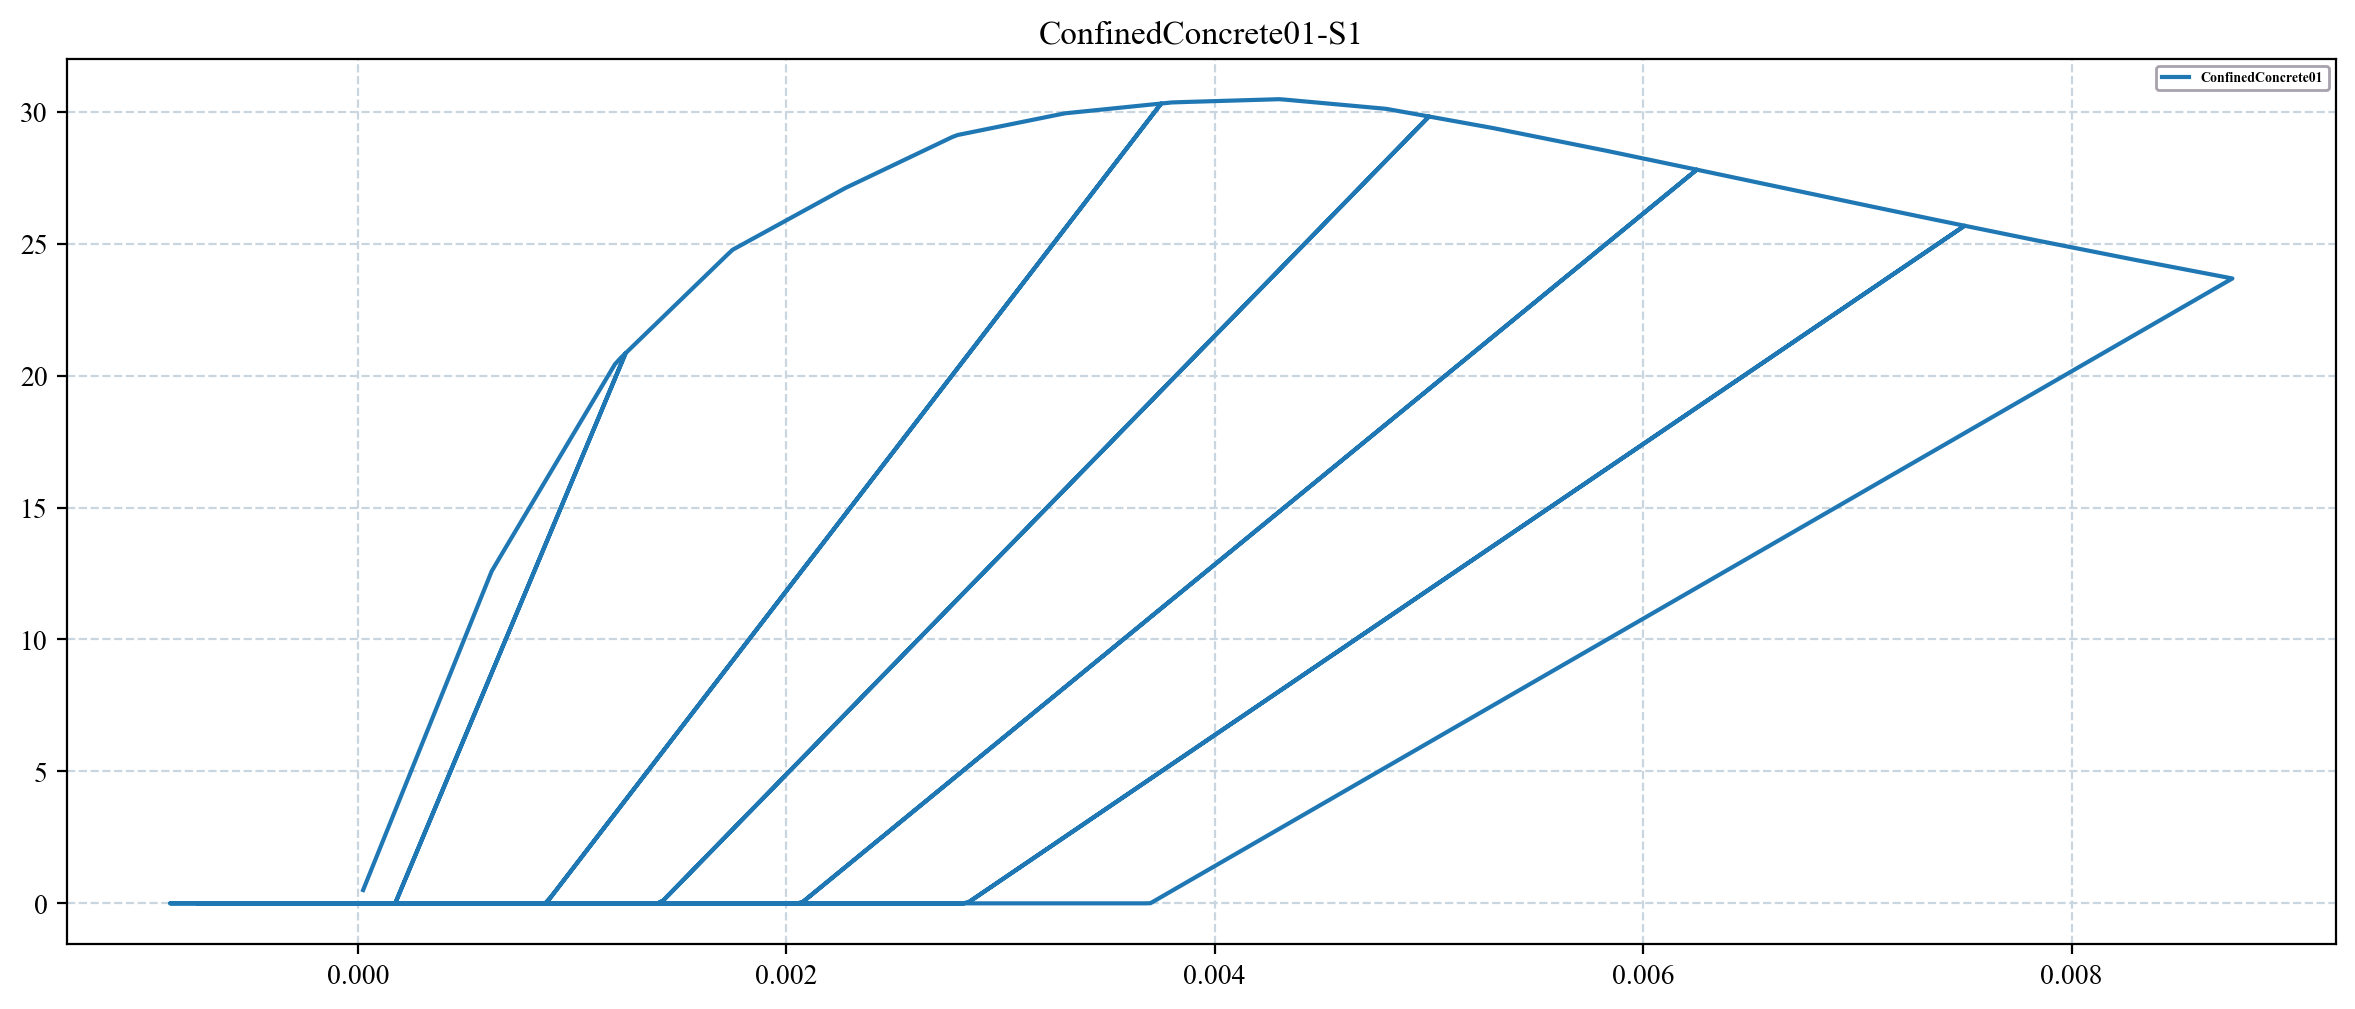

In [8]:
if not os.path.exists('ConfinedConcrete01'):
    os.makedirs('ConfinedConcrete01')

font_Times_New_Roman={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}
font_Times_New_Roman_legend={"family":"Times New Roman",
                        # "style": "italic",
                        "weight":"heavy",
                        "size":5}

font_Song={"family":"SimSun",
        "style":"italic",
        "weight":"heavy",
        "size":15}
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,5),dpi=200)
# fig.subplots_adjust(left=0.15,right=0.95,top=0.95,bottom=0.15)
fig.tight_layout()
bwith = 1.5 

ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)
IDConcrete = 1
ops.uniaxialMaterial('ConfinedConcrete01', IDConcrete,'S1',-30.0,26081.0,'-epscu',-0.03,'-varUB',300.0,10.0,100.0,300.0,206000.0,0.0,1000.0,16.0,'-stRatio',0.85)
ops.node(1,0,0)
ops.node(2,100,0)
ops.equalDOF(1,2,2,3)
ops.fix(1,1,1,1)
ops.fix(2,0,1,1)
ops.element('twoNodeLink',1,1,2,'-mat',IDSteel,'-dir',1)
ops.recorder('Node', '-file', f"./ConfinedConcrete01/IDConcrete_Disp{i}.txt","-time",'-node', 2, '-dof',1, 'disp')
ops.recorder('Node', '-file', f"./ConfinedConcrete01/IDConcrete_Reaction{i}.txt","-time",'-node', 1, '-dof',1, 'reaction')
ops.timeSeries('Linear', 11)
ops.pattern('Plain', 100,11)
ops.sp(2,1,1)
ops.system("BandGeneral")
ops.numberer("RCM")
ops.constraints("Penalty",1e5,1e5)
ops.test('NormDispIncr', 1e-5, 2000)
ops.algorithm("KrylovNewton")

ops.integrator("DisplacementControl",2,1,-0.000025)
ops.analysis("Static")
ops.analyze(50)

ops.integrator("DisplacementControl",2,1,0.000025)
ops.analysis("Static")
ops.analyze(55)

ops.integrator("DisplacementControl",2,1,-0.000025)
ops.analysis("Static")
ops.analyze(155)

ops.integrator("DisplacementControl",2,1,0.000025)
ops.analysis("Static")
ops.analyze(165)

ops.integrator("DisplacementControl",2,1,-0.000025)
ops.analysis("Static")
ops.analyze(215)

ops.integrator("DisplacementControl",2,1,0.000025)
ops.analysis("Static")
ops.analyze(220)

ops.integrator("DisplacementControl",2,1,-0.000025)
ops.analysis("Static")
ops.analyze(270)

ops.integrator("DisplacementControl",2,1,0.000025)
ops.analysis("Static")
ops.analyze(275)

ops.integrator("DisplacementControl",2,1,-0.000025)
ops.analysis("Static")
ops.analyze(325)

ops.integrator("DisplacementControl",2,1,0.000025)
ops.analysis("Static")
ops.analyze(330)

ops.integrator("DisplacementControl",2,1,-0.000025)
ops.analysis("Static")
ops.analyze(380)

ops.integrator("DisplacementControl",2,1,0.000025)
ops.analysis("Static")
ops.analyze(385)

ops.integrator("DisplacementControl",2,1,-0.000025)
ops.analysis("Static")
ops.analyze(35)

ops.wipe()

Disp=np.loadtxt(f'./ConfinedConcrete01/IDConcrete_Disp{i}.txt',usecols=1)
Force=np.loadtxt(f'./ConfinedConcrete01/IDConcrete_Reaction{i}.txt',usecols=1)

ax.plot(-Disp,Force,label='ConfinedConcrete01')

ax.grid(linestyle='--',color='#c9d6df')                      

ax.set_title(f'ConfinedConcrete01-S1')
ax.legend(prop=font_Times_New_Roman_legend,edgecolor='#928a97',facecolor='none')
plt.show()